<a href="https://colab.research.google.com/github/LeopoldoGitHub/Financial_Fraud_Detection_10BCX/blob/main/Financial_Fraud_Detection_Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEMA DE NEGOCIO

La urgencia por detectar fraudes en transacciones móviles de dinero ha llevado a una empresa del segmento Fintech a buscar soluciones innovadoras. Como científicos de datos hemos sido convocados para desarrollar un modelo de machine learning que pueda distinguir de manera precisa entre transacciones legítimas y fraudulentas, estableciendo así un estándar de seguridad en el sector financiero móvil global.

Tus tareas principales serán:
1. Preprocesamiento de Datos: Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

2. Exploración de Datos: Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

3. Construcción de Modelos: Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

4. Evaluación y Selección del Modelo: Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la detección de transacciones bancarias fraudulentas.

# 1. Configuración del Ambiente

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
!pip install -U imbalanced-learn
!pip install ydata-profiling
from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=da5276ea3eba6b3ec467933c4e1686aa9edffe7f9aedadb1065a5d9e3a96b49d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


# 2. Preprocesamiento de Datos

In [ ]:
df_banco = pd.read_csv('Fraud_detection.csv')
df_banco

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Conocimiento de las variables
STEP: Se han identificado 744 registros. Considerando un mes de 31 días, se puede realizar la conversión de "Step" a un formato horario de 24 horas distribuido a lo largo de los 31 días. Esto permitirá un análisis más detallado del comportamiento temporal de los datos.

TYPE: Se identifican 5 tipos de transacciones:

CASH_OUT (2,237,500 transacciones): Este tipo de transacción refleja la salida de dinero de la cuenta de un cliente, como puede ser a través de retiros de efectivo.
PAYMENT (2,151,495 transacciones):Este tipo de transacción generalmente involucra el pago de servicios, como el pago de facturas.
CASH_IN (1,399,284 transacciones): Las transacciones de CASH-IN representan el ingreso de dinero a la cuenta de un cliente. Estas pueden involucrar depósitos de dinero efectivo, transferencias de fondos recibidas de otras cuentas, o cualquier otra forma de ingreso monetario.
TRANSFER (532,909 transacciones): Las TRANSFERENCIAS implican mover dinero de la cuenta de un cliente a otra cuenta, ya sea dentro del mismo banco o entre diferentes bancos.
DEBIT (41,432 transacciones): Similar a CASH_OUT, pero más comúnmente asociado con pequeñas cantidades. Esto incluye el uso de tarjetas de débito para transacciones diarias, indican compras o pagos realizados usando fondos directamente de la cuenta del cliente.
TYPE2: Clasificación de Usuarios en Transacciones: Se ha identificado que la letra inicial de las cuentas de origen y destinatario es indicativa del tipo de usuario: 'C' para clientes y 'M' para comercios. Esto ha motivado la creación de la variable "TYPE2", que facilita la identificación y diferenciación de los tipos de usuarios involucrados en las transacciones. Esta clasificación es esencial para realizar análisis específicos relacionados con el comportamiento de transacción de clientes versus comercios, proporcionando así insights valiosos sobre las interacciones entre estos dos grupos.

In [ ]:
conteo_step = df_banco['step'].value_counts()
print(conteo_step)

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64


In [ ]:
conteo_type = df_banco['type'].value_counts
print(conteo_type)

<bound method IndexOpsMixin.value_counts of 0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object>


In [ ]:
df_banco.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# Verificación si hay valores faltantes

print(df_banco.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
# Generar un informe de perfil de los datos
profile = ProfileReport(df_banco)
profile.to_widgets()  # Mostrar el informe en forma de widgets interactivos

# Visualizar la distribución de la variable objetivo 'isFraud'
sns.countplot(data=df_banco, x='isFraud')
plt.title('Distribución de transacciones fraudulentas')
plt.show()

# Visualizar la relación entre 'type' y 'isFraud'
sns.countplot(data=df_banco, x='type', hue='isFraud')
plt.title('Relación entre tipo de transacción y fraude')
plt.xticks(rotation=45)
plt.show()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Crear la nueva columna 'type2' combinando la primera letra de 'nameOrig' y 'nameDest'
df_banco['type2'] = df_banco['nameOrig'].str[0] + df_banco['nameDest'].str[0]
print(df_banco[['nameOrig','nameDest', 'type2']])

            nameOrig     nameDest type2
0        C1231006815  M1979787155    CM
1        C1666544295  M2044282225    CM
2        C1305486145   C553264065    CC
3         C840083671    C38997010    CC
4        C2048537720  M1230701703    CM
...              ...          ...   ...
6362615   C786484425   C776919290    CC
6362616  C1529008245  C1881841831    CC
6362617  C1162922333  C1365125890    CC
6362618  C1685995037  C2080388513    CC
6362619  C1280323807   C873221189    CC

[6362620 rows x 3 columns]


INSIGTH VALIOSOS SOBE LA INFORMACION RECABADA

Análisis Detallado de Transacciones Fraudulentas

De un total de registros analizados, 8,213 transacciones fueron clasificadas como fraudulentas, lo que representa un índice de fraude del 0.129%. Adicionalmente, el porcentaje de fraude en relación al monto total involucrado es del 1.053%. Este dato destaca una discrepancia importante entre la frecuencia de fraudes y su impacto económico, sugiriendo que, aunque el número de fraudes es relativamente bajo, el valor monetario afectado es considerablemente más significativo.
Canales de Transacción Vulnerables:

Las únicas modalidades de transacción donde se detectaron actividades fraudulentas fueron CASH_OUT y TRANSFER. Esto indica que estos canales son particularmente susceptibles al fraude, probablemente debido a la naturaleza de las transacciones que facilitan movimientos de fondos grandes y rápidos.
Se presenta un analisis de porque estas dos categoriaspodrian estar mas expuestas al fraude:

TRANSFERENCIA
Alto Volumen Monetario: Las transferencias suelen involucrar grandes cantidades de dinero. Esto las convierte en un objetivo atractivo para los defraudadores que buscan maximizar el retorno de sus actividades ilegales. Anonimato y Complejidad: Las transferencias pueden cruzar fronteras internacionales y ser dirigidas a jurisdicciones con menor regulación o supervisión. Esto puede dificultar el rastreo del origen y el destino final de los fondos, proporcionando un cierto grado de anonimato. Manipulación de Cuentas y Falsificación de Identidades: Los defraudadores pueden usar identidades robadas o ficticias para abrir cuentas, desde las cuales realizan transferencias fraudulentas. La dificultad para verificar la autenticidad de las partes involucradas en la transferencia facilita este tipo de fraude.

CASH OUT
Extracción Rápida de Fondos: Este tipo de transacción permite a los defraudadores convertir rápidamente dinero ilícito en efectivo, que es más difícil de rastrear que los movimientos de cuenta a cuenta. Esto es particularmente útil para blanquear dinero obtenido a través de actividades ilícitas. Uso de Cajeros Automáticos y Tecnología: Los fraudes en "CASH OUT" pueden involucrar el uso de dispositivos de skimming en cajeros automáticos o el hacking de cuentas para realizar retiros no autorizados. Vulnerabilidades en la Seguridad: Las transacciones de retiro de efectivo pueden explotar vulnerabilidades en los sistemas de seguridad de los bancos, como la explotación de tarjetas clonadas o el uso de fallos de seguridad en las redes de cajeros automáticos.

Menor Susceptibilidad de Otros Tipos

CASH IN: Generalmente involucra el depósito de fondos en cuentas, lo cual es menos atractivo para los defraudadores ya que implica poner dinero en lugar de sacarlo. PAGO y DÉBITO: Estos tipos de transacciones suelen ser de menor cuantía y están más directamente vinculados a actividades diarias legítimas (como pagar facturas o compras). Además, son más fáciles de rastrear y verificar por las entidades financieras y comerciales, lo que disminuye el interés y las oportunidades de fraude.

Naturaleza de las Cuentas Involucradas:

Se observó que los fraudes involucraron principalmente transacciones entre cuentas de origen y destinatarias que pertenecen a clientes. Esto podría indicar una explotación de vulnerabilidades en la gestión de cuentas cliente-cliente.

In [ ]:
conteo_fraude = df_banco['isFraud'].value_counts()
print(conteo_fraude)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [ ]:
# Porcentaje de fraude
print((8213/6354407)*100,'%')

0.129248881917699 %


In [ ]:
# Porcentaje de fraude por monto de transacciones
transacciones_fraudulentas = df_banco[df_banco['isFraud'] == 1]
suma_monto_fraude = transacciones_fraudulentas['amount'].sum()
print("Transacciones Fraudulentas:", suma_monto_fraude.round())

suma_monto = df_banco['amount'].sum()
print("Suma Monto:", suma_monto)

Transacciones Fraudulentas: 12056415428.0
Suma Monto: 1144392944759.77


In [ ]:
# Porcentaje de fraude
print('Porcentaje de Fraude:',(12056415427.839998/1144392944759.77)*100,'%')

Porcentaje de Fraude: 1.0535206008606486 %


In [ ]:
# Agrupamos 'isFraud' para mirar identificar los canales donde se esta haciendo fraude
conteo_type_fraude = df_banco.groupby('type')['isFraud'].value_counts()
print(conteo_type_fraude)

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: count, dtype: int64


Podemos concluir que la mayor modalidad de fraude es CAS_OUT con 4116, le sigue TRANSFER con 4097

In [ ]:
# Agrupamos 'type2' para mirar identificar los canales de fraude
conteo_type2_fraude = df_banco.groupby('type2')['isFraud'].value_counts()
print(conteo_type2_fraude)

type2  isFraud
CC     0          4202912
       1             8213
CM     0          2151495
Name: count, dtype: int64


DESCRIPTIVOS

Análisis del DataFrame df_fraude

Se tienen 8213 registros de fraude
Standard Deviation (Desviación Estándar):Las altas desviaciones estándar en amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, y newbalanceDest sugieren una amplia variabilidad en los montos de las transacciones fraudulentas.

Monto Promedio: El monto promedio en df_fraude es significativamente mayor que en df_banco, lo que podría indicar que las transacciones fraudulentas tienden a ser por montos mayores.

Balance en Destino: Aunque el oldbalanceDest en df_fraude tiene una media de 544,249.6, este no es tan alto como podría esperarse, indicando que muchas cuentas de destino no tienen grandes sumas antes de la transacción fraudulenta, apoyando la observación de que a menudo se usan cuentas con poco o ningún saldo previo.

Un patrón recurrente observado en actividades fraudulentas es cuando el monto de la transacción coincide exactamente con el saldo disponible en la cuenta de origen. Este comportamiento puede indicar un intento deliberado de vaciar completamente la cuenta, lo cual es una táctica común entre los defraudadores. Identificar transacciones donde el monto es igual al saldo inicial puede ser una regla de negocio efectiva para detectar y prevenir este tipo de fraude. Implementar este criterio como parte de las estrategias de monitoreo y control permite interceptar acciones sospechosas antes de que resulten en pérdidas significativas, mejorando así la seguridad financiera y la confianza del cliente.

In [ ]:
df_fraude = df_banco[df_banco['isFraud']==1]
df_fraude.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type2
6351081,698,CASH_OUT,2184556.65,C679742636,2184556.65,0.0,C1476073685,734500.25,2919056.89,1,0,CC
1496070,142,CASH_OUT,78810.30,C688380113,78810.30,0.0,C1780087922,802788.52,881598.82,1,0,CC
6362449,730,CASH_OUT,403.56,C1790729382,403.56,0.0,C1460854172,1124708.32,1125111.88,1,0,CC
6171502,563,CASH_OUT,25529.76,C1146878331,25529.76,0.0,C1153941405,9798.98,35328.74,1,0,CC
1059547,103,CASH_OUT,1254092.10,C1741433244,1254092.10,0.0,C663883872,0.00,1254092.10,1,0,CC
6013692,449,TRANSFER,166880.54,C692202599,166880.54,0.0,C1404927892,0.00,0.00,1,0,CC
6348631,695,CASH_OUT,799123.57,C999561448,799123.57,0.0,C1038753033,5474293.01,6273416.58,1,0,CC
6281787,650,TRANSFER,230652.43,C1117030253,230652.43,0.0,C1682998072,0.00,0.00,1,0,CC
6296679,678,CASH_OUT,194876.96,C1352461400,194876.96,0.0,C1257290689,148344.11,343221.07,1,0,CC
5188043,366,CASH_OUT,769619.59,C87506936,769619.59,0.0,C770921525,32332.95,801952.54,1,0,CC


In [ ]:
df_fraude.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


## Creación de Variables

In [ ]:
df_banco['hora_del_dia'] = df_banco['step'] % 24
df_banco['dia'] = df_banco['step'] // 24 + 1
print(df_banco[['step', 'hora_del_dia', 'dia']].sample(10))

         step  hora_del_dia  dia
2374634   191            23    8
1237495   134            14    6
5261243   372            12   16
4035553   299            11   13
2731210   212            20    9
2337174   189            21    8
2382423   201             9    9
3839535   282            18   12
6287208   661            13   28
4973354   352            16   15


## Clasificamos las horas del dia en las siguientes categorias: Madrugada, Mañana, Tarde y Noche.

In [ ]:
def clasificar_horario(hora):
  if 0 <= hora < 6:
    return 'Madrugada'
  elif 6 <= hora < 12:
    return 'Mañana'
  elif 12 <= hora < 18:
    return 'Tardes'
  else:
    return 'Noche'

df_banco['horario'] = df_banco['hora_del_dia'].apply(clasificar_horario)
print(df_banco[['hora_del_dia', 'horario']].sample(10))

         hora_del_dia    horario
2281021            19      Noche
3212590             9     Mañana
4994142            16     Tardes
1674605            14     Tardes
2450039            11     Mañana
5985528             0  Madrugada
3143533            20      Noche
3278418            11     Mañana
5107235            19      Noche
2611915            16     Tardes


Variable Rango_fondo

Categorizar los valores de oldbalanceDest según los rangos:

- Sin saldo: Cuando oldbalanceDest es igual a 0.
- Saldo menor a 147,828.7: Cuando oldbalanceDest es mayor que 0 y menor que 147,828.7.
- Saldo superior a 147,828.7: Cuando oldbalanceDest es igual o superior a 147,828.7.

In [ ]:
def clasificar_fondo(balance):
  if balance == 0:
    return 'Sin_Saldo'

  else:
    return 'Con_saldo'

# Aplicamos la funcion para crear la nueva columna 'rango_fondo'
df_banco['rango_fondo'] = df_banco['oldbalanceDest'].apply(clasificar_fondo)

# Verificación de los resultados
print(df_banco[['oldbalanceDest', 'rango_fondo']].sample(10))

         oldbalanceDest rango_fondo
2473378            0.00   Sin_Saldo
1613416            0.00   Sin_Saldo
1161420            0.00   Sin_Saldo
85056              0.00   Sin_Saldo
4062536            0.00   Sin_Saldo
3007089            0.00   Sin_Saldo
2424846      2448809.94   Con_saldo
2694693            0.00   Sin_Saldo
3254319      3422242.40   Con_saldo
1647243            0.00   Sin_Saldo


Variable intento_vaciar

Esta variable ayuda a identificar si se intentó vaciar la cuenta de origen, una práctica comúnmente observada en incidentes de fraude. Los defraudadores a menudo modifican sus estrategias cuando detectan que un patrón de fraude ha sido identificado, adaptando sus métodos para evitar la detección. En lugar de vaciar completamente las cuentas, pueden optar por dejar un pequeño saldo remanente. Para adaptarse a esta evolución en el comportamiento del fraude, hemos establecido un margen que considera un saldo remanente del 5%. Si el monto de la transacción representa el 95% o más del saldo original, se considera un intento de vaciar la cuenta, capturando así tanto los intentos completos como los casi completos de extracción de fondos.

- 1 = Si intento vaciar cuenta
- 0 = no intento vaciar cuenta

In [ ]:
def intento_vaciar_cuenta(amount, oldbalance):

  umbral = 0.95

  if amount >= oldbalance*umbral:
    return 1
  else:
    return 0

# Creamos una nueva columna 'intentar_vaciar'
df_banco['intento_vaciar'] = df_banco.apply(lambda x: intento_vaciar_cuenta(x['amount'], x['oldbalanceOrg']), axis=1)

# Verificar los resultados
print(df_banco[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'intento_vaciar']].head())

   step      type    amount  oldbalanceOrg  newbalanceOrig  intento_vaciar
0     1   PAYMENT   9839.64       170136.0       160296.36               0
1     1   PAYMENT   1864.28        21249.0        19384.72               0
2     1  TRANSFER    181.00          181.0            0.00               1
3     1  CASH_OUT    181.00          181.0            0.00               1
4     1   PAYMENT  11668.14        41554.0        29885.86               0


In [ ]:
# Preprocesamiento de Datos

# Codificar variables categóricas
df_encoded = pd.get_dummies(df_banco, columns=['type'], drop_first=True)

# Eliminar columnas no relevantes para el modelo
df_cleaned = df_encoded.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

# Dividir los datos en conjunto de entrenamiento y prueba
X = df_cleaned.drop('isFraud', axis=1)
y = df_cleaned['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para manejar el desbalance de clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Construcción de Modelos

# Inicializar modelos
logreg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()

models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb_model
}

# Entrenar y evaluar modelos
resultados = {}

for nombre, modelo in models.items():
    modelo.fit(X_train_resampled, y_train_resampled)
    y_pred = modelo.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    resultados[nombre] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }

# Mostrar resultados
resultados_df = pd.DataFrame(resultados)
resultados_df


,Logistic Regression,Decision Tree,Random Forest,Naive Bayes
Accuracy,0.922452,0.997589,0.998524,0.242041
Precision,0.012531,0.236364,0.368421,0.001297
Recall,1.000000,0.650000,0.700000,1.000000
F1-Score,0.024752,0.346667,0.482759,0.002590
ROC AUC,0.961188,0.823966,0.849409,0.620647


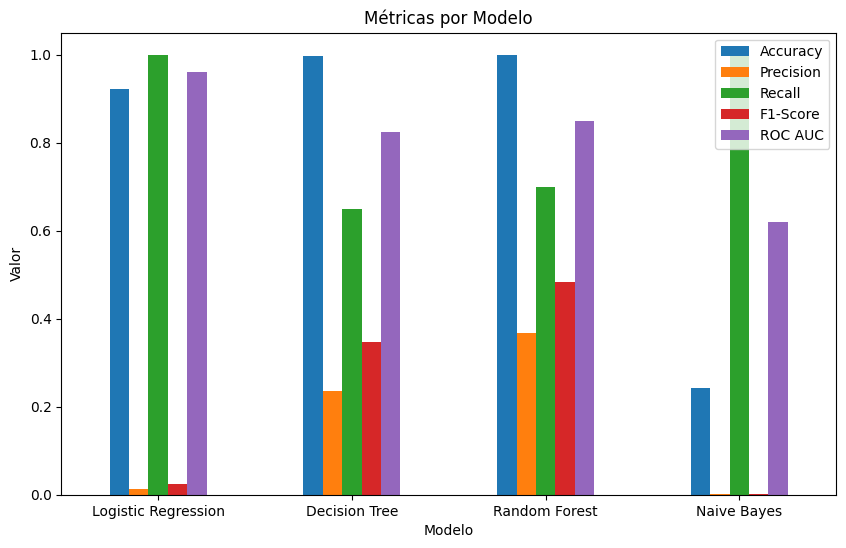

In [ ]:
# Visualizar las métricas por modelo
resultados_df.T.plot(kind='bar', figsize=(10, 6))
plt.title('Métricas por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()